In [31]:
import pandas as pd
import numpy as np
import json
import gmaps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
from census import Census
from config import gkey
from IPython.display import display
import ipywidgets as widgets
import gmaps.geojson_geometries
from scipy.stats import linregress

gmaps.configure(api_key=gkey)


In [2]:
file = "../Resources/Austin Data Set CSV.csv"
base_df = pd.read_csv(file)

In [49]:
base_df.numOfBedrooms.unique()

array([ 4,  3,  5,  8,  7,  2,  6,  1,  0, 10, 20], dtype=int64)

In [33]:
mask = base_df.city == 'austin'
newDf = base_df[mask].reset_index()

In [39]:
mask = newDf.lotSizeSqFt != 1508482800.0
new = newDf[mask]
new.head()

,index,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,17,116080992,austin,10505 Cannon Mark Way,78717,*PLEASE SEE THE WALKTHROUGH VIRTUAL TOUR*This ...,30.486408,-97.794724,2.21,0,...,1,1,3.266667,7.666667,1259,14,6.0,5,2,116080992_83c089e97b4e96ecb01c3555fa8252d0-p_f...
1,18,88013985,austin,15524 Staked Plains Loop,78717,Rare opportunity in this high demand area of A...,30.494375,-97.796516,2.21,2,...,1,1,1.933333,8.333333,1481,16,4.0,5,2,88013985_6d4b35d2a232c42fcc863317f22401c7-p_f.jpg
2,19,70344594,austin,15217 Sabal Palm Rd,78724,Charming Home boasting 3 bedrooms and 2 baths....,30.255707,-97.576958,1.98,2,...,1,1,2.433333,2.666667,1478,13,2.0,3,1,70344594_3e29ab1c54a4a8ca80360911b9ac7434-p_f.jpg
3,20,185217484,austin,14004 Chisos Trl,78717,"COVETED, SPACIOUS 3 bed + OFFICE, 1story MIL P...",30.495638,-97.797874,2.21,0,...,1,1,1.900000,8.333333,1481,16,2.0,3,1,185217484_1f06634bc9d5424bc0f094f68ca72fe4-p_f...
4,21,121719682,austin,14108 Laurinburg Dr,78717,Stunning Modern Design~Super Well Maintained~M...,30.490257,-97.791740,2.21,2,...,1,1,3.266667,7.666667,1259,14,4.0,4,2,121719682_4a0a90d12c692fe1bd74b32f2a0dc05f-p_f...


In [46]:
mask = new.numOfBathrooms != 27.0
new1 = new[mask]
new1.numOfBathrooms.value_counts

<bound method IndexOpsMixin.value_counts of 0        6.0
1        4.0
2        2.0
3        2.0
4        4.0
        ... 
15015    2.0
15016    4.0
15017    3.0
15018    2.0
15019    1.0
Name: numOfBathrooms, Length: 15018, dtype: float64>

In [41]:
mask = new1.homeType == "Single Family"
cleaned_data = new1[mask]
cleaned_data.homeType.value_counts()

Single Family    14094
Name: homeType, dtype: int64

In [42]:
cleaned_data.columns

Index(['index', 'zpid', 'city', 'streetAddress', 'zipcode', 'description',
       'latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [43]:
city_latslong = cleaned_data[["latitude", "longitude", "latestPrice"]]
city_latslong

,latitude,longitude,latestPrice
0,30.486408,-97.794724,687850
1,30.494375,-97.796516,409000
2,30.255707,-97.576958,199000
3,30.495638,-97.797874,400000
5,30.488775,-97.794899,549900
...,...,...,...
15014,30.185915,-97.828415,280000
15015,30.161997,-97.816345,330000
15016,30.240223,-97.772835,550000
15017,30.244835,-97.761124,875000


In [44]:
price = cleaned_data['latestPrice']
price

0        687850
1        409000
2        199000
3        400000
5        549900
          ...  
15014    280000
15015    330000
15016    550000
15017    875000
15019    374900
Name: latestPrice, Length: 14094, dtype: int64

In [9]:
sale_year = cleaned_data[["latest_saleyear", "latitude", 'longitude', "latestPrice"]]
sale_year

,latest_saleyear,latitude,longitude,latestPrice
0,2019,30.430632,-97.663078,305000
1,2020,30.432672,-97.661697,295000
2,2019,30.409748,-97.639771,256125
3,2018,30.432112,-97.661659,240000
4,2018,30.437368,-97.656860,239900
...,...,...,...,...
15165,2020,30.185915,-97.828415,280000
15166,2020,30.161997,-97.816345,330000
15167,2020,30.240223,-97.772835,550000
15168,2021,30.244835,-97.761124,875000


In [10]:
sale_year.rename(columns= {'latest_saleyear': 'year'}, inplace=True)
sale_year

C:\Users\arnol\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,year,latitude,longitude,latestPrice
0,2019,30.430632,-97.663078,305000
1,2020,30.432672,-97.661697,295000
2,2019,30.409748,-97.639771,256125
3,2018,30.432112,-97.661659,240000
4,2018,30.437368,-97.656860,239900
...,...,...,...,...
15165,2020,30.185915,-97.828415,280000
15166,2020,30.161997,-97.816345,330000
15167,2020,30.240223,-97.772835,550000
15168,2021,30.244835,-97.761124,875000


In [11]:
base_df.lotSizeSqFt.value_counts()
# swap out sqft for something more manageable.  like year, house type, etc.  

11325.6     300
12196.8     285
11761.2     281
6969.0      258
7840.0      233
           ... 
10004.0       1
138085.2      1
7474.0        1
9722.0        1
5867.0        1
Name: lotSizeSqFt, Length: 1426, dtype: int64

In [12]:
# locations = city_latslong[["latitude", "longitude"]]
# fig = gmaps.figure(map_type='TERRAIN')
# heatmap_layer = gmaps.heatmap_layer(locations, weights=cleaned_data['latestPrice']) 

# fig.add_layer(heatmap_layer)
# # fig.add_layer(gmaps.traffic_layer)
# fig

In [13]:

heatmap_layer.point_radius = 15

NameError: name 'heatmap_layer' is not defined

In [ ]:
# class Interactive(object):
  

#     def __init__(self, count_of_schools):
#         self._df = count_of_schools
#         self._heatmap = None
#         self._slider = None
#         min_count = min(self._df['numOfPrimarySchools'])

#         map_figure = self._render_map(min_count)
#         controls = self._render_controls(min_count)
#         self._container = widgets.VBox([title_widget, controls, map_figure])
        
#         title_widget = widgets.HTML('<h3>Home Price by Square Footage</h3>''<h4>Data from The Austin Housing Project</a></h4>')

#     def render(self):
#         display(self._container)

#     def _on_year_change(self, change):
#         numOfPrimarySchools = self._slider.value
#         self._heatmap.locations = self._locations_for_year(numOfPrimarySchools)
#         self._total_box.value = self._total_count_of_schools_text(numOfPrimarySchools)
#         return self._container

#     def _render_map(self, min_count):
#         fig = gmaps.figure(map_type='TERRAIN')
#         self._heatmap = gmaps.heatmap_layer(self._locations_for_year(min_count),
#             max_intensity=100,
#             point_radius=8
#         )
        
#         fig.add_layer(self._heatmap)
#         return fig

#     def _render_controls(self, min_sqft):
#         self._slider = widgets.IntSlider(
#             value=min_count,
#             min=min(self._df['numOfPrimarySchools']),
#             max=max(self._df['numOfPrimarySchools']),
#             description='Count of schools',
#             continuous_update=False
#         )
#         self._total_box = widgets.Label(
#             value=self._total_count_of_schools_text(min_count)
#         )
#         self._slider.observe(self._on_year_change, names='value')
#         controls = widgets.HBox(
#             [self._slider, self._total_box],
#             layout={'justify_content': 'space-between'}
#         )
#         return controls

#     def _locations_for_year(self, numOfPrimarySchools):
#         return self._df[self._df['numOfPrimarySchools'] == numOfPrimarySchools][['latitude', 'longitude']]

#     def _total_count_of_schools(self, numOfPrimarySchools):
#         return int(self._df[self._df['numOfPrimarySchools'] == numOfPrimarySchools]['numOfPrimarySchools'].count())

#     def _total_count_of_schools_text(self, numOfPrimarySchools):
#         return '{} Count of schools'.format(self._total_count_of_schools(numOfPrimarySchools))
    


# Interactive(sqft_price).render()

In [ ]:
# class Interactive(object): 
    
#     def __init__(self, sale_year):
#         self._df = sale_year
#         self._heatmap = None
#         self._slider = None
#         initial_year = min(self._df['year'])

#         title_widget = widgets.HTML(
#             '<h3>Home sales by year</h3>''<h4>Data from The Austin Housing Project</a></h4>'
#             )


#         map_figure = self._render_map(initial_year)
#         controls = self._render_controls(initial_year)
#         self._container = widgets.VBox([title_widget, controls, map_figure])

#     def render(self):
#         display(self._container)

#     def _on_year_change(self, change):
#         year = self._slider.value
#         self._heatmap.locations = self._locations_for_year(year)
#         self._total_box.value = self._total_sales_text_for_year(year)
#         return self._container

#     def _render_map(self, initial_year):
#         fig = gmaps.figure(map_type='HYBRID')
#         self._heatmap = gmaps.heatmap_layer(
#             self._locations_for_year(initial_year),
#             max_intensity=25,
#             point_radius=20
#         )
#         fig.add_layer(self._heatmap)
#         return fig

#     def _render_controls(self, initial_year):
#         self._slider = widgets.IntSlider(
#             value=initial_year,
#             min=min(self._df['year']),
#             max=max(self._df['year']),
#             description='Year',
#             continuous_update=False
#         )
#         self._total_box = widgets.Label(
#             value=self._total_sales_text_for_year(initial_year)
#         )
#         self._slider.observe(self._on_year_change, names='value')
#         controls = widgets.HBox(
#             [self._slider, self._total_box],
#             layout={'justify_content': 'space-between'}
#         )
#         return controls

#     def _locations_for_year(self, year):
#         return self._df[self._df['year'] == year][['latitude', 'longitude']]

#     def _total_sales_for_year(self, year):
#         return int(self._df[self._df['year'] == year]['year'].count())

#     def _total_sales_text_for_year(self, year):
#         return '{} Total Home Sales'.format(self._total_sales_for_year(year))


# Interactive(sale_year).render()

In [14]:
sale_month = cleaned_data[["latest_salemonth", "latitude", 'longitude', "latestPrice"]]
sale_month

,latest_salemonth,latitude,longitude,latestPrice
0,9,30.430632,-97.663078,305000
1,10,30.432672,-97.661697,295000
2,7,30.409748,-97.639771,256125
3,8,30.432112,-97.661659,240000
4,10,30.437368,-97.656860,239900
...,...,...,...,...
15165,11,30.185915,-97.828415,280000
15166,12,30.161997,-97.816345,330000
15167,12,30.240223,-97.772835,550000
15168,1,30.244835,-97.761124,875000


In [ ]:
# sale_month = cleaned_data[["latest_salemonth", "latitude", 'longitude', "latestPrice"]]
# sale_month.rename(columns= {'latest_salemonth': 'Month'}, inplace=True)
# sale_month

In [15]:
sale_month.rename(columns= {'latest_salemonth': 'Month'}, inplace=True)
sale_month

C:\Users\arnol\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Month,latitude,longitude,latestPrice
0,9,30.430632,-97.663078,305000
1,10,30.432672,-97.661697,295000
2,7,30.409748,-97.639771,256125
3,8,30.432112,-97.661659,240000
4,10,30.437368,-97.656860,239900
...,...,...,...,...
15165,11,30.185915,-97.828415,280000
15166,12,30.161997,-97.816345,330000
15167,12,30.240223,-97.772835,550000
15168,1,30.244835,-97.761124,875000


In [ ]:
# class Interactive(object): 
    
#     def __init__(self, sale_month):
#         self._df = sale_month
#         self._heatmap = None
#         self._slider = None
#         initial_month = min(self._df['Month'])

#         title_widget = widgets.HTML(
#             '<h3>Home sales by Month</h3>''<h4>Data from The Austin Housing Project</a></h4>'
#             )


#         map_figure = self._render_map(initial_month)
#         controls = self._render_controls(initial_month)
#         self._container = widgets.VBox([title_widget, controls, map_figure])

#     def render(self):
#         display(self._container)

#     def _on_month_change(self, change):
#         Month = self._slider.value
#         self._heatmap.locations = self._locations_for_month(Month)
#         self._total_box.value = self._total_sales_text_for_month(Month)
#         return self._container

#     def _render_map(self, initial_month):
#         fig = gmaps.figure(map_type='HYBRID')
#         self._heatmap = gmaps.heatmap_layer(
#             self._locations_for_month(initial_month),
#             max_intensity=25,
#             point_radius=25
#         )
#         fig.add_layer(self._heatmap)
#         return fig

#     def _render_controls(self, initial_month):
#         self._slider = widgets.IntSlider(
#             value=initial_month,
#             min=min(self._df['Month']),
#             max=max(self._df['Month']),
#             description='Month',
#             continuous_update=False
#         )
#         self._total_box = widgets.Label(
#             value=self._total_sales_text_for_month(initial_month)
#         )
#         self._slider.observe(self._on_month_change, names='value')
#         controls = widgets.HBox(
#             [self._slider, self._total_box],
#             layout={'justify_content': 'space-between'}
#         )
#         return controls

#     def _locations_for_month(self, Month):
#         return self._df[self._df['Month'] == Month][['latitude', 'longitude']]

#     def _total_sales_for_month(self, Month):
#         return int(self._df[self._df['Month'] == Month]['Month'].count())

#     def _total_sales_text_for_month(self, Month):
#         return '{} historical Home Sales by Month'.format(self._total_sales_for_month(Month))


# Interactive(sale_month).render()

In [ ]:
# sqft = cleaned_data[["latest_salemonth", "latitude", 'longitude', "livingAreaSqFt"]]
# sale_month.rename(columns= {'latest_salemonth': 'Month'}, inplace=True)
# sale_month

In [ ]:
# locations = city_latslong[["latitude", "longitude"]]
# fig = gmaps.figure(map_type='TERRAIN')
# heatmap_layer = gmaps.heatmap_layer(locations, weights=cleaned_data['livingAreaSqFt']) 

# fig.add_layer(heatmap_layer)
# # fig.add_layer(gmaps.traffic_layer)
# fig

In [16]:
cleaned_data.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [ ]:
# locations = city_latslong[["latitude", "longitude"]]
# fig = gmaps.figure(map_type='TERRAIN')
# heatmap_layer = gmaps.heatmap_layer(locations, weights=cleaned_data['lotSizeSqFt']) 

# fig.add_layer(heatmap_layer)
# # fig.add_layer(gmaps.traffic_layer)
# fig

In [17]:
cleaned_data.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [18]:
total_sales = cleaned_data.latestPrice.sum()
total_sales

7351484865

In [19]:
count_ofhomes = len(cleaned_data)
count_ofhomes

14239

In [20]:
average_price = total_sales/count_ofhomes
average_price

516292.216096636

In [21]:
cleaned_data.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [24]:
sq_zip = cleaned_data[["zipcode", "latestPrice", "lotSizeSqFt",
                           "livingAreaSqFt", "avgSchoolRating"]]
sq_zip.head()

,zipcode,latestPrice,lotSizeSqFt,livingAreaSqFt,avgSchoolRating
0,78660,305000,6011.0,2601,2.666667
1,78660,295000,6185.0,1768,2.666667
2,78660,256125,7840.0,1478,3.000000
3,78660,240000,6098.0,1678,2.666667
4,78660,239900,6708.0,2132,4.000000


In [25]:
sqft_zip = sq_zip.groupby(["zipcode"])

sqft_zip_df = sqft_zip.mean()
sqft_zip_df.head()

# average of each zip code, to add more averages simply add the column name to the sq_zip DF

,latestPrice,lotSizeSqFt,livingAreaSqFt,avgSchoolRating
zipcode,,,,
78617,196995.023810,6447.023810,1637.952381,3.158730
78619,753149.166667,65267.400000,3642.000000,7.388889
78652,375339.750000,7428.750000,1796.750000,4.500000
78653,238293.333333,11775.466667,1757.666667,4.777778
78660,285712.529412,7787.005882,2009.000000,3.254902


In [26]:
census_file = "../Thi_work/Census_data.csv"
census_results = pd.read_csv(census_file)
census_results.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,Alabama,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,Alabama,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,Alabama,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,Alabama,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [27]:
census_results.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       ...
       'RDOMESTICMIG2019', 'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015', 'RNETMIG2016', 'RNETMIG2017',
       'RNETMIG2018', 'RNETMIG2019'],
      dtype='object', length=164)

In [28]:
cols = ["CTYNAME", "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018", "POPESTIMATE2019"]
counties_df = census_results.loc[:, cols]
counties_df.head()

,CTYNAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,Autauga County,54773,55227,54954,54727,54893,54864,55243,55390,55533,55869
2,Baldwin County,183112,186558,190145,194885,199183,202939,207601,212521,217855,223234
3,Barbour County,27327,27341,27169,26937,26755,26283,25806,25157,24872,24686
4,Bibb County,22870,22745,22667,22521,22553,22566,22586,22550,22367,22394


In [29]:
cols = ["POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018", "POPESTIMATE2019"]
pop_df = census_results.loc[:, cols]
pop_df.head()

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,54773,55227,54954,54727,54893,54864,55243,55390,55533,55869
2,183112,186558,190145,194885,199183,202939,207601,212521,217855,223234
3,27327,27341,27169,26937,26755,26283,25806,25157,24872,24686
4,22870,22745,22667,22521,22553,22566,22586,22550,22367,22394


The r-squared is: 0.0033890986877857525


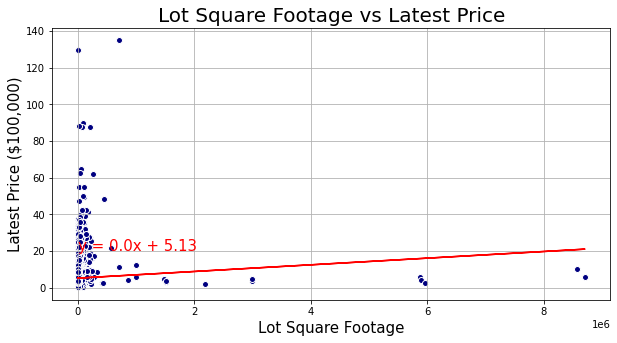

In [32]:
x_values = cleaned_data['lotSizeSqFt']
y_values = cleaned_data['latestPrice'] / 100000

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Lot Square Footage vs Latest Price', fontsize=20)
plt.xlabel('Lot Square Footage', fontsize=15)
plt.ylabel('Latest Price ($100,000)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

In [ ]:
sns.set_theme(style="whitegrid")